In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
from matplotlib.ticker import ScalarFormatter

In [60]:
#**** DATA WRANGLING ****
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths_csv = pd.read_csv(url_deaths)

In [61]:
deaths_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,598,618,639,675,683,703,721,733,746,774
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,44,45,47,49,51,53,55,58,62,65
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,852,861,869,878,885,892,897,905,912,920
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,10,10,10,10,10,10,11,11,13,15


In [62]:
print(deaths_csv.shape)

(266, 166)


In [63]:
print(deaths_csv.isnull().values.any())

True


In [64]:
print(deaths_csv.columns[deaths_csv.isna().any()].tolist())

['Province/State']


In [65]:
deaths_csv.notna().any()

Province/State    True
Country/Region    True
Lat               True
Long              True
1/22/20           True
                  ... 
6/27/20           True
6/28/20           True
6/29/20           True
6/30/20           True
7/1/20            True
Length: 166, dtype: bool

In [66]:
deaths_csv.isna().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/27/20             0
6/28/20             0
6/29/20             0
6/30/20             0
7/1/20              0
Length: 166, dtype: int64

In [67]:
deaths_csv.dropna()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,48,48,49,49,49,49,49,49,49,49
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
250,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,2
255,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
deaths_MMSM = deaths_csv.copy()
deaths_MMSM['max'] = deaths_MMSM.iloc[:,4:].max(axis=1)
deaths_MMSM['min'] = deaths_MMSM.iloc[:,4:].min(axis=1)
deaths_MMSM['sum'] = deaths_MMSM.iloc[:,4:].sum(axis=1)
deaths_MMSM['mean'] = deaths_MMSM.iloc[:,4:].mean(axis=1)

In [69]:
deaths_MMSM.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,max,min,sum,mean
63,Hunan,China,27.610400,111.708800,0,0,0,0,0,0,...,4,4,4,4,4,4,4,0,562,6.812121
23,NaN,Belgium,50.833300,4.000000,0,0,0,0,0,0,...,9731,9732,9732,9732,9747,9754,9754,0,718855,8713.393939
60,Henan,China,33.882000,113.614000,0,0,0,0,1,1,...,22,22,22,22,22,22,22,0,3078,37.309091
42,Ontario,Canada,51.253800,-85.323200,0,0,0,0,0,0,...,2706,2711,2717,2726,2730,2734,2734,0,157413,1908.036364
234,NaN,Mozambique,-18.665695,35.529562,0,0,0,0,0,0,...,5,5,5,6,6,6,6,0,127,1.539394


In [70]:
deaths_CountryMax = deaths_MMSM.groupby('Country/Region')['max'].sum()
deaths_CountryMax

Country/Region
Afghanistan           774
Albania                65
Algeria               920
Andorra                52
Angola                 15
                     ... 
West Bank and Gaza      8
Western Sahara          1
Yemen                 318
Zambia                 30
Zimbabwe                7
Name: max, Length: 188, dtype: int64

In [71]:
#**** VISUALIZATION 1 ****

# Drop unecessary columns, group by country to get totals
deaths_total_by_date = deaths_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
deaths_total_by_date = deaths_total_by_date.melt(id_vars=['Country/Region'], var_name='Date', value_name='Deaths')
deaths_total_by_date['Date'] = pd.to_datetime(deaths_total_by_date.Date)
deaths_total_by_date = deaths_total_by_date.drop('Country/Region', axis=1).groupby('Date').sum().reset_index()
deaths_total_by_date

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
157,2020-06-27,499291
158,2020-06-28,502450
159,2020-06-29,506076
160,2020-06-30,511268


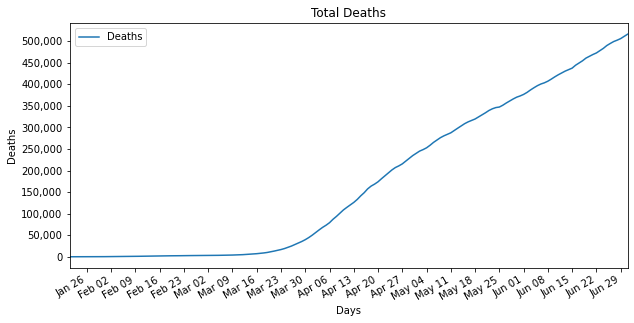

In [98]:
deaths_total_by_date.plot(x="Date", y="Deaths", figsize=(10,5))
plt.title('Total Deaths')
plt.xlabel('Days')
plt.ylabel('Deaths')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()

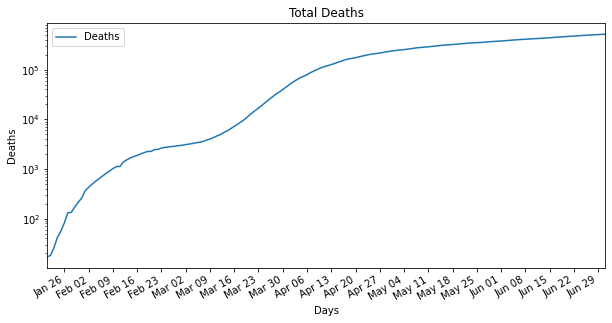

In [73]:
deaths_total_by_date.plot(x="Date", y="Deaths", figsize=(10,5))
plt.title('Total Deaths')
plt.xlabel('Days')
plt.ylabel('Deaths')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gcf().autofmt_xdate() # Rotation
plt.yscale('log')
plt.show()

In [74]:
daily_deaths = deaths_total_by_date
daily_deaths.insert(2, "New Deaths", daily_deaths['Deaths'].diff(), True)
daily_deaths['New Deaths'] = np.where(daily_deaths['New Deaths'].isnull(),daily_deaths['Deaths'],daily_deaths['New Deaths']).astype(int)
daily_deaths = daily_deaths.drop(['Deaths'], axis=1)
daily_deaths

,Date,New Deaths
0,2020-01-22,17
1,2020-01-23,1
2,2020-01-24,8
3,2020-01-25,16
4,2020-01-26,14
...,...,...
157,2020-06-27,4518
158,2020-06-28,3159
159,2020-06-29,3626
160,2020-06-30,5192


In [75]:
daily_deaths['3 Day Rolling Average'] = daily_deaths['New Deaths'].rolling(3).mean()
daily_deaths = daily_deaths.dropna()
daily_deaths

,Date,New Deaths,3 Day Rolling Average
2,2020-01-24,8,8.666667
3,2020-01-25,16,8.333333
4,2020-01-26,14,12.666667
5,2020-01-27,26,18.666667
6,2020-01-28,49,29.666667
...,...,...,...
157,2020-06-27,4518,5304.666667
158,2020-06-28,3159,4174.000000
159,2020-06-29,3626,3767.666667
160,2020-06-30,5192,3992.333333


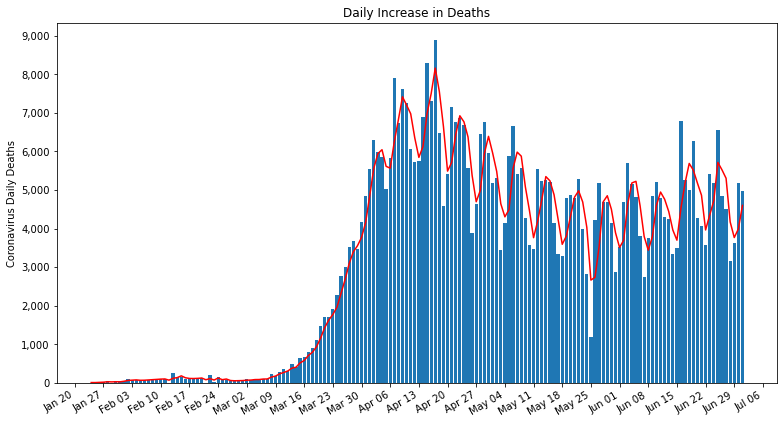

In [100]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
plt.plot(daily_deaths['Date'], daily_deaths['3 Day Rolling Average'], color='r')
ax.bar(daily_deaths['Date'],daily_deaths['New Deaths'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gcf().autofmt_xdate() #Rotation
plt.title('Daily Increase in Deaths')
plt.ylabel('Coronavirus Daily Deaths')
plt.show()

In [77]:
#**** VISUALIZATION 2 ****
# Drop unecessary columns, group by country to get totals
deaths_since_10th_death = deaths_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
deaths_since_10th_death = deaths_since_10th_death.melt(id_vars=['Country/Region'], var_name='Date', value_name='Deaths')
deaths_since_10th_death['Date'] = pd.to_datetime(deaths_since_10th_death.Date)
deaths_since_10th_death

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
30451,West Bank and Gaza,2020-07-01,8
30452,Western Sahara,2020-07-01,1
30453,Yemen,2020-07-01,318
30454,Zambia,2020-07-01,30


In [78]:
deaths_since_10th_death = deaths_since_10th_death[deaths_since_10th_death.Deaths >= 10]
deaths_since_10th_death

,Country/Region,Date,Deaths
36,China,2020-01-22,17
224,China,2020-01-23,18
412,China,2020-01-24,26
600,China,2020-01-25,42
788,China,2020-01-26,56
...,...,...,...
30447,Uruguay,2020-07-01,28
30448,Uzbekistan,2020-07-01,26
30449,Venezuela,2020-07-01,54
30453,Yemen,2020-07-01,318


In [79]:
death_10_by_country = deaths_since_10th_death.groupby('Country/Region').first().reset_index()
death_10_by_country.drop('Deaths', axis=1)

,Country/Region,Date
0,Afghanistan,2020-04-06
1,Albania,2020-03-28
2,Algeria,2020-03-20
3,Andorra,2020-03-31
4,Angola,2020-06-22
...,...,...
141,Uruguay,2020-04-19
142,Uzbekistan,2020-05-03
143,Venezuela,2020-04-21
144,Yemen,2020-05-12


In [80]:
deaths_since_10th_death.sort_values(['Country/Region', 'Date'])
D_List = deaths_since_10th_death['Country/Region'].unique()
compiled_df = pd.DataFrame(columns=['Country/Region', 'Date', 'Deaths'])

for d in D_List: #for every country
    temp = deaths_since_10th_death.loc[deaths_since_10th_death['Country/Region'] == d]#Here are the deaths over 10 for that country
    temp = temp.assign(death10 = lambda x: temp['Date'] - temp.loc[temp['Country/Region'] == temp['Country/Region'], 'Date'].iloc[0])#for each of these,subtract dates
    compiled_df = compiled_df.append(temp, ignore_index=True)
    
compiled_df['death10'] = compiled_df.apply(lambda row: row.death10.days, axis=1)
deaths_since_10th_death = compiled_df.rename(columns={'death10': 'Days since 10th death'})

deaths_since_10th_death

,Country/Region,Date,Deaths,Days since 10th death
0,China,2020-01-22,17,0
1,China,2020-01-23,18,1
2,China,2020-01-24,26,2
3,China,2020-01-25,42,3
4,China,2020-01-26,56,4
...,...,...,...,...
11494,Eswatini,2020-07-01,11,3
11495,Montenegro,2020-06-28,11,0
11496,Montenegro,2020-06-29,11,1
11497,Montenegro,2020-06-30,12,2


In [81]:
deaths_since_10th_death_groupby = deaths_since_10th_death.groupby(['Country/Region', 'Date'])
deaths_since_10th_death_groupby.first()

Deaths  Days since 10th death
Country/Region Date                                     
Afghanistan    2020-04-06      11                      0
               2020-04-07      14                      1
               2020-04-08      14                      2
               2020-04-09      15                      3
               2020-04-10      15                      4
...                           ...                    ...
Zambia         2020-06-27      21                     19
               2020-06-28      22                     20
               2020-06-29      22                     21
               2020-06-30      24                     22
               2020-07-01      30                     23

[11499 rows x 2 columns]

In [82]:
deaths_since_10th_death_graph = deaths_since_10th_death.copy()
deaths_since_10th_death_graph = deaths_since_10th_death_graph.set_index(["Country/Region", "Days since 10th death"])
deaths_since_10th_death_graph = deaths_since_10th_death_graph.unstack('Country/Region')['Deaths']

deaths_since_10th_death_graph.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Yemen,Zambia
Days since 10th death,,,,,,,,,,,,,,,,,,,,,
0,11,10,11,12,10,13,10,13,16,10,...,30,11,10,10,10,10,10,10,10,10
1,14,10,15,14,10,18,12,13,21,11,...,37,12,13,10,28,10,10,10,12,10
2,14,11,17,15,10,19,13,14,28,11,...,44,14,17,11,43,12,10,10,12,10
3,15,15,17,16,10,23,13,16,30,12,...,59,17,20,12,66,12,10,10,15,10
4,15,15,19,17,10,27,14,17,49,13,...,75,21,22,12,82,12,10,10,18,10


In [83]:
highlighted_countries = ['US', 'Spain', 'Italy', 'Germany', 'United Kingdom', 'France', 'Korea, South', 'Ireland', 'Singapore', 'Japan']
gray_countries = death_10_by_country['Country/Region'].tolist()
gray_countries = [e for e in gray_countries if e not in highlighted_countries]
#Is 'US' in the list? If not, it works
'US' in gray_countries

False

In [84]:
last_death_by_country = deaths_since_10th_death.groupby('Country/Region').last().reset_index()
last_death_by_country = last_death_by_country.drop('Date', axis=1)
last_death_by_country

,Country/Region,Deaths,Days since 10th death
0,Afghanistan,774,86
1,Albania,65,95
2,Algeria,920,103
3,Andorra,52,92
4,Angola,15,9
...,...,...,...
141,Uruguay,28,73
142,Uzbekistan,26,59
143,Venezuela,54,71
144,Yemen,318,50


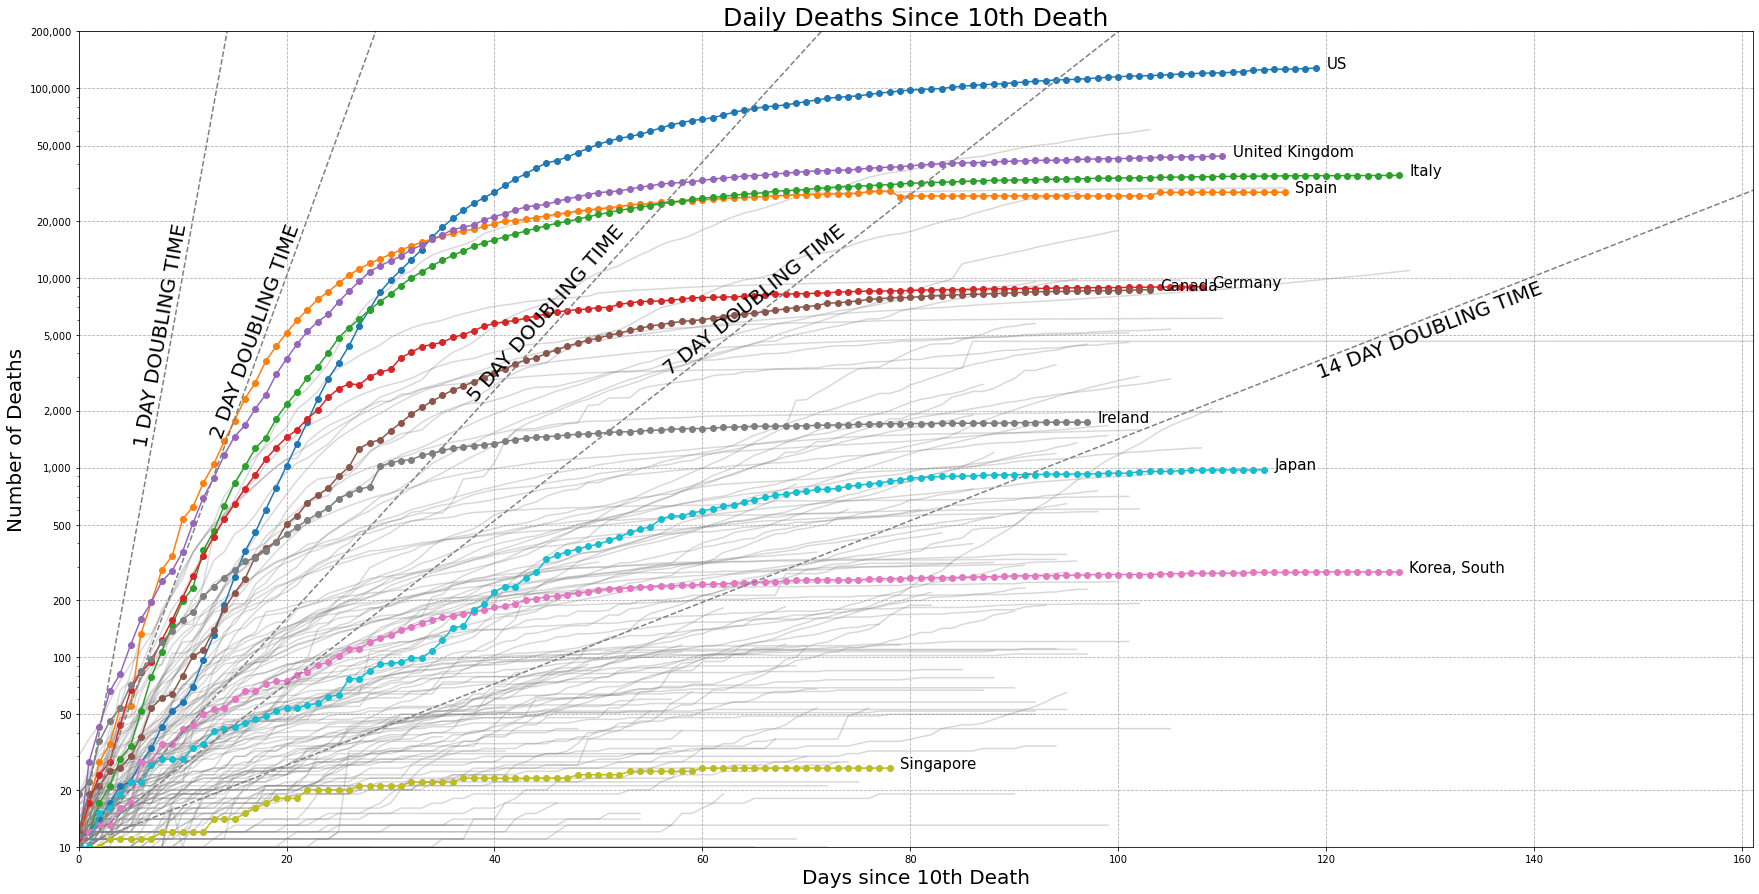

In [139]:
plt.figure(figsize=(30,15))
y_max = max(deaths_since_10th_death['Deaths'])
x_max = max(deaths_since_10th_death_graph.index)

plt.ylim([10, y_max])
plt.xlim([0, x_max])
plt.plot(range(0, len(deaths_since_10th_death_graph.index)), deaths_since_10th_death_graph[gray_countries], color="grey", alpha=0.3)
plt.plot(range(0, len(deaths_since_10th_death_graph.index)), deaths_since_10th_death_graph[highlighted_countries], '-o')

#COUNTRY LABLES
label_df = last_death_by_country.loc[last_death_by_country['Country/Region'].isin(highlighted_countries)]
offset = 1
for index, row in label_df.iterrows(): 
   plt.text(row['Days since 10th death']+offset, row['Deaths'], row['Country/Region'], fontsize=15)

#DOUBLING LINES
day1 = np.arange(0, 21, 1)
day2 = np.arange(0, 41, 2)
day5 = np.arange(0, 101, 5)
day7 = np.arange(0, 141, 7)
day14 = np.arange(0, 281, 14)
doubling_function = (2**day1)*10
plt.plot(day1, doubling_function, color="grey", linestyle='dashed')
plt.text(8, 20000, '1 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=80,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day2, doubling_function, color="grey", linestyle='dashed')
plt.text(17, 20000, '2 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=70,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day5, doubling_function, color="grey", linestyle='dashed')
plt.text(45, 20000, '5 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=49,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day7, doubling_function, color="grey", linestyle='dashed')
plt.text(65, 20000, '7 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=39,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day14, doubling_function, color="grey", linestyle='dashed')
plt.text(130, 10000, '14 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=21,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')


plt.yscale('log')
plt.margins(0)
plt.grid(True, linestyle='--')
plt.yticks([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000], 
           ['10', '20', '50', '100', '200', '500', '1,000', '2,000', '5,000', '10,000', '20,000', '50,000', '100,000', '200,000'])
plt.title('Daily Deaths Since 10th Death', fontsize=25)
plt.ylabel('Number of Deaths', fontsize=20)
plt.xlabel('Days since 10th Death', fontsize=20)
plt.show()

In [86]:
# **** VISUALIZATION 3 ****
# Drop unnecessary columns, group by country to get totals
deaths_new_vs_total = deaths_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
deaths_new_vs_total = deaths_new_vs_total.melt(id_vars=['Country/Region'], var_name='Date', value_name='Daily Total Deaths')
deaths_new_vs_total['Date'] = pd.to_datetime(deaths_new_vs_total.Date)
deaths_new_vs_total

,Country/Region,Date,Daily Total Deaths
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
30451,West Bank and Gaza,2020-07-01,8
30452,Western Sahara,2020-07-01,1
30453,Yemen,2020-07-01,318
30454,Zambia,2020-07-01,30


In [87]:
#Get Daily New Deaths
deaths_new_vs_total['Daily New Deaths'] = deaths_new_vs_total.groupby(['Country/Region'])['Daily Total Deaths'].diff().fillna(0)
deaths_new_vs_total['Daily New Deaths'] = deaths_new_vs_total['Daily New Deaths'].astype(int)
deaths_new_vs_total

,Country/Region,Date,Daily Total Deaths,Daily New Deaths
0,Afghanistan,2020-01-22,0,0
1,Albania,2020-01-22,0,0
2,Algeria,2020-01-22,0,0
3,Andorra,2020-01-22,0,0
4,Angola,2020-01-22,0,0
...,...,...,...,...
30451,West Bank and Gaza,2020-07-01,8,0
30452,Western Sahara,2020-07-01,1,0
30453,Yemen,2020-07-01,318,6
30454,Zambia,2020-07-01,30,6


In [88]:
deaths_new_vs_total_groupby = deaths_new_vs_total.groupby(['Country/Region', 'Date'])
deaths_new_vs_total_groupby.first()

Daily Total Deaths  Daily New Deaths
Country/Region Date                                            
Afghanistan    2020-01-22                   0                 0
               2020-01-23                   0                 0
               2020-01-24                   0                 0
               2020-01-25                   0                 0
               2020-01-26                   0                 0
...                                       ...               ...
Zimbabwe       2020-06-27                   6                 0
               2020-06-28                   6                 0
               2020-06-29                   7                 1
               2020-06-30                   7                 0
               2020-07-01                   7                 0

[30456 rows x 2 columns]

In [89]:
deaths_new_vs_total_test = deaths_new_vs_total[deaths_new_vs_total['Country/Region'] == 'Russia']
deaths_new_vs_total_test

,Country/Region,Date,Daily Total Deaths,Daily New Deaths
140,Russia,2020-01-22,0,0
328,Russia,2020-01-23,0,0
516,Russia,2020-01-24,0,0
704,Russia,2020-01-25,0,0
892,Russia,2020-01-26,0,0
...,...,...,...,...
29656,Russia,2020-06-27,8958,188
29844,Russia,2020-06-28,9060,102
30032,Russia,2020-06-29,9152,92
30220,Russia,2020-06-30,9306,154


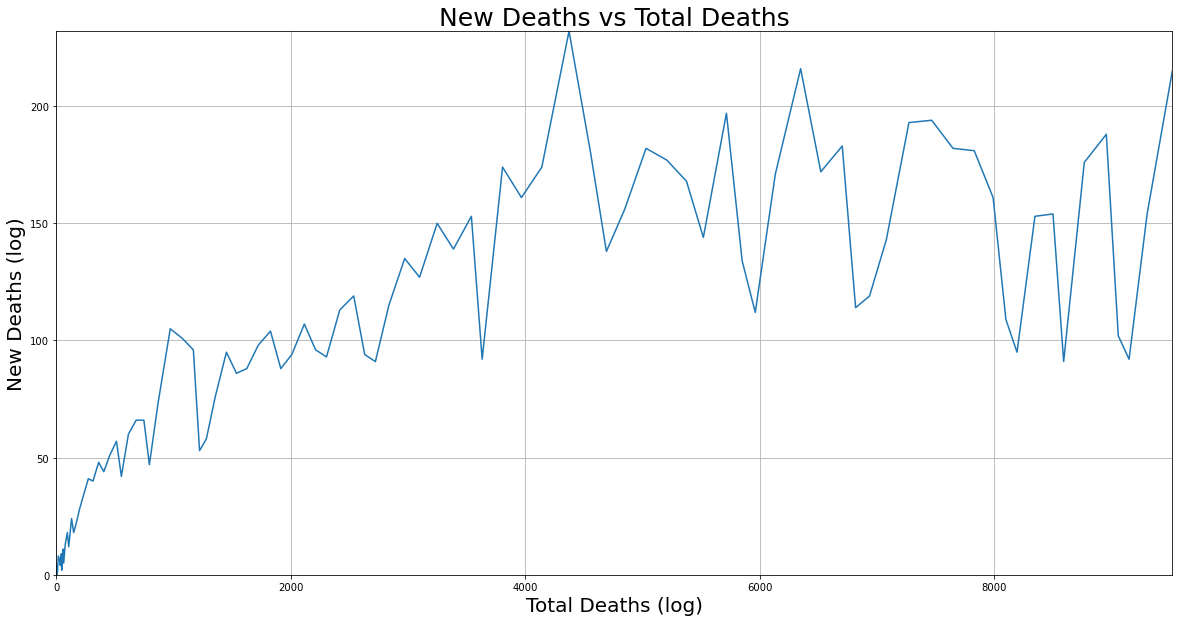

In [90]:
plt.figure(figsize=(20, 10))
df = deaths_new_vs_total[deaths_new_vs_total['Country/Region'] == 'Russia']
plt.plot(df['Daily Total Deaths'], df['Daily New Deaths'])
plt.margins(0)
plt.grid(True)
plt.title('New Deaths vs Total Deaths', fontsize=25)
plt.ylabel('New Deaths (log)', fontsize=20)
plt.xlabel('Total Deaths (log)', fontsize=20)
plt.show()

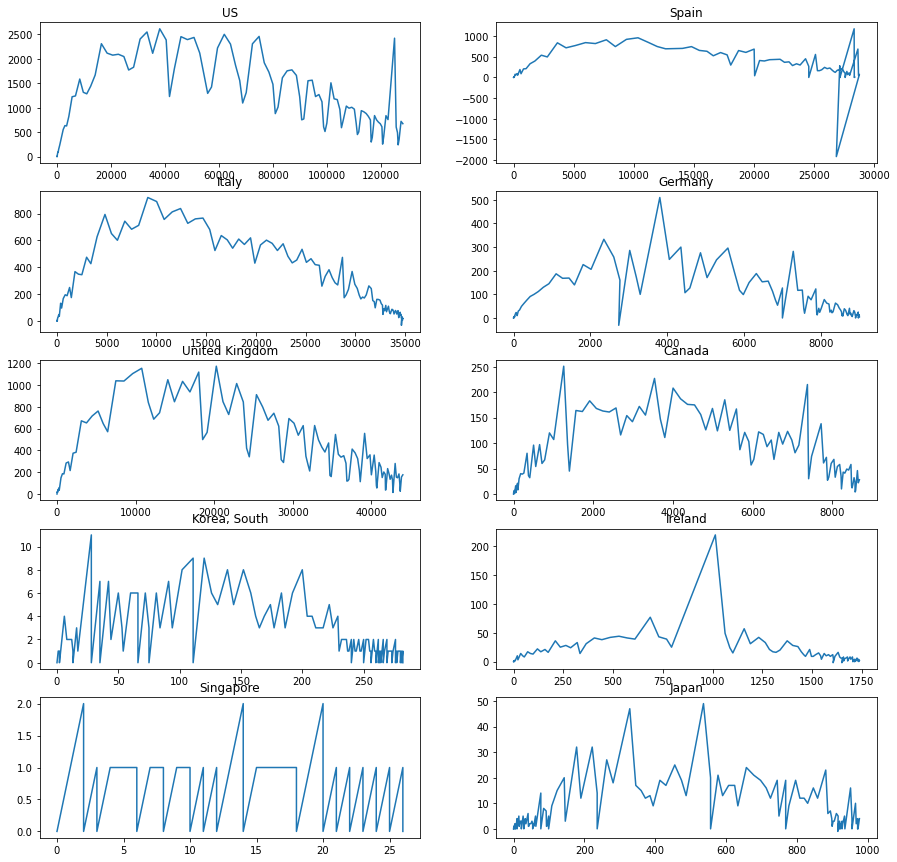

In [91]:
fig,a =  plt.subplots(5,2, figsize=(15,15))
x = 0
for i in range(0, 5):
    for j in range(0, 2):
        country = highlighted_countries[x]
        df = deaths_new_vs_total[deaths_new_vs_total['Country/Region'] == country]
        a[i][j].plot(df['Daily Total Deaths'], df['Daily New Deaths'])
        a[i][j].set_title(country)
        x = x + 1
plt.show()

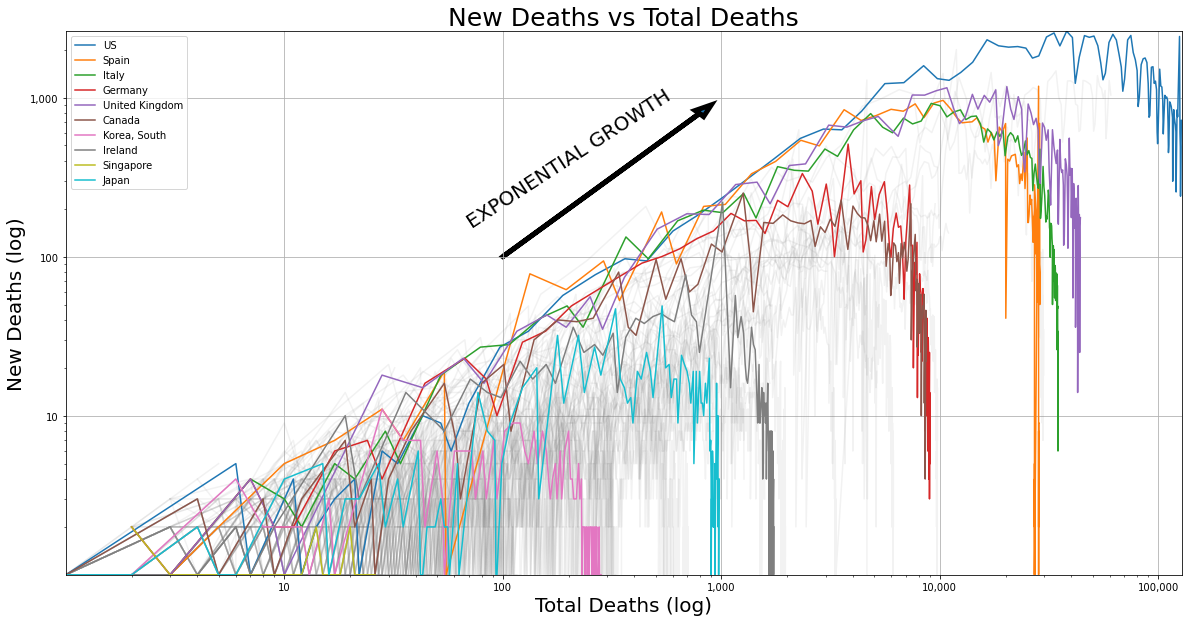

In [141]:
plt.figure(figsize=(20, 10))

for country in gray_countries: 
    df = deaths_new_vs_total[deaths_new_vs_total['Country/Region'] == country]
    df = df[(df['Daily New Deaths'] > 0)]
    plt.plot(df['Daily Total Deaths'], df['Daily New Deaths'], color="grey", alpha=0.1)

for country in highlighted_countries: 
    df = deaths_new_vs_total[deaths_new_vs_total['Country/Region'] == country]
    df = df[(df['Daily New Deaths'] > 0)]
    plt.plot(df['Daily Total Deaths'], df['Daily New Deaths'], label= country)

leg = plt.legend();
plt.yscale('log')
plt.xscale('log')
plt.yticks([0, 10, 100, 1000, 10000, 100000], 
           ['0', '10', '100', '1,000', '10,000', '100,000'])
plt.xticks([0, 10, 100, 1000, 10000, 100000, 1000000], 
           ['0', '10', '100', '1,000', '10,000', '100,000', '1,000,000'])
plt.margins(0)
plt.grid(True)
plt.title('New Deaths vs Total Deaths', fontsize=25)
plt.ylabel('New Deaths (log)', fontsize=20)
plt.xlabel('Total Deaths (log)', fontsize=20)

#arrow
plt.arrow(100, 100, 800, 800, lw = 5, length_includes_head=True, head_width=100)
plt.text(200, 1200, 'EXPONENTIAL GROWTH', fontsize=20, rotation=33, horizontalalignment='center', verticalalignment='top', multialignment='center')

plt.show()